# Titanic: Machine Learning from Disaster
### Predict survival on the Titanic
타이타닉에 탔던 사람의 특징을 파악해서 살 수 있는 사람이지 아닌지 파악
- Defining the problem statement
- Collecting the data
- Exploratory data analysis
- Feature engineering
- Modelling
- Testing

## 1. Defining the problem statement
Complete the analysis of what sorts of people were likely to survive.  
In particular, we ask you to apply the tools of machine learning to predict which passengers survived the Titanic tragedy.

## 2. Collecting the data

training data set and testing data set are given by Kaggle
you can download from  
my github [https://github.com/minsuk-heo/kaggle-titanic/tree/master](https://github.com/minsuk-heo/kaggle-titanic)  
or you can download from kaggle directly [kaggle](https://www.kaggle.com/c/titanic/data)  

### load train, test dataset using Pandas

In [28]:
import pandas as pd

train = pd.read_csv('/Users/mirae/Desktop/ESAA/수업자료/0529_titanic사례실습/input/train.csv')
test = pd.read_csv('/Users/mirae/Desktop/ESAA/수업자료/0529_titanic사례실습/input/test.csv')

## 3. Exploratory data analysis
Printing first 5 rows of the train dataset.

In [29]:
# train 80개 행 불러오기
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Dictionary
- Survived: 	0 = No, 1 = Yes  
- pclass: 	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd  	
- sibsp:	# of siblings / spouses aboard the Titanic  	
- parch:	# of parents / children aboard the Titanic  	
- ticket:	Ticket number	
- cabin:	Cabin number	
- embarked:	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton  

**Total rows and columns**

We can see that there are 891 rows and 12 columns in our training dataset.

In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.shape

(891, 12)

In [6]:
test.shape

(418, 11)

In [7]:
train.info() #각각의 데이터가 몇개의 행, 어떤 자료형인지 알 수 있음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


We can see that *Age* value is missing for many rows. 

Out of 891 rows, the *Age* value is present only in 714 rows.

Similarly, *Cabin* values are also missing in many rows. Only 204 out of 891 rows have *Cabin* values.

In [9]:
#train test 결측치 확인
train.isnull().sum() #true값의 합

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

There are 177 rows with missing *Age*, 687 rows with missing *Cabin* and 2 rows with missing *Embarked* information.

### import python lib for visualization

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots #sns패키지를 디폴트로 사용하겠다는 뜻이라고..

### Bar Chart for Categorical Features
- Pclass
- Sex
- SibSp ( # of siblings and spouse)
- Parch ( # of parents and children)
- Embarked
- Cabin

In [31]:
#각 범주형 변수 별로 사망자와 생존자에 대해 그림을 그리는 plot 함수 만들기
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts() #survived가 1인데이터 중 feature 열에 해당하는 값만
    death = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,death])
    df.index= ['survived','death']
    df.plot(kind='bar',stacked=True,figsize=(10,5))

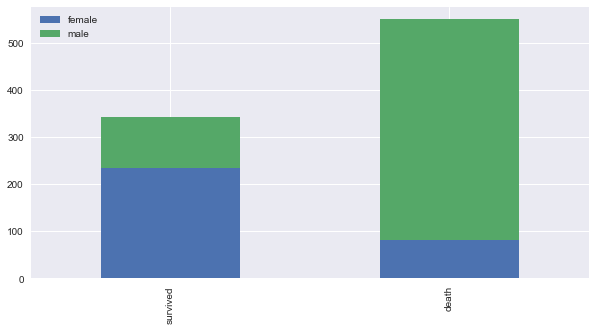

In [13]:
bar_chart('Sex')

The Chart confirms **Women** more likely survivied than **Men**

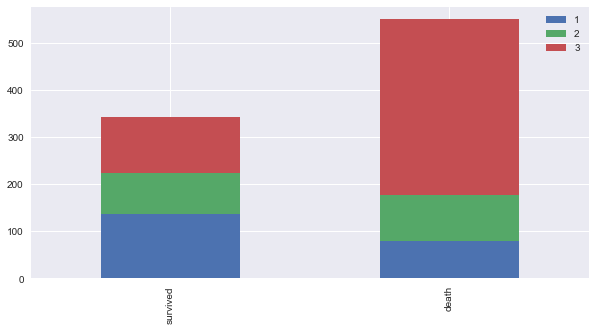

In [14]:
bar_chart('Pclass')

The Chart confirms **1st class** more likely survivied than **other classes**  
The Chart confirms **3rd class** more likely dead than **other classes**

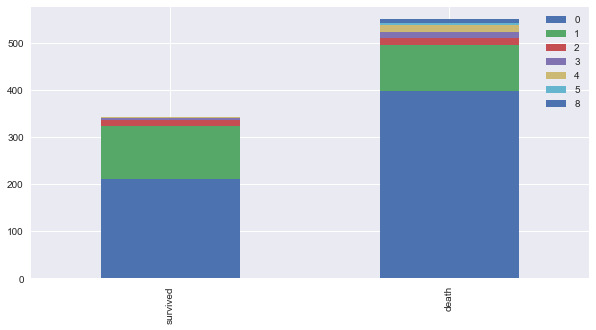

In [15]:
bar_chart('SibSp')

The Chart confirms **a person aboarded with more than 2 siblings or spouse** more likely survived  
The Chart confirms ** a person aboarded without siblings or spouse** more likely dead

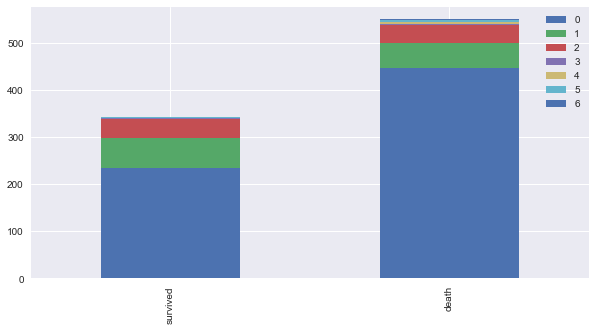

In [16]:
bar_chart('Parch')

The Chart confirms **a person aboarded with more than 2 parents or children** more likely survived  
The Chart confirms ** a person aboarded alone** more likely dead

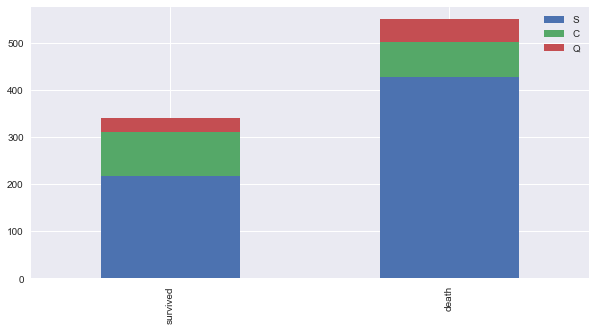

In [17]:
bar_chart('Embarked') #s클래스가 많이 사망

The Chart confirms **a person aboarded from C** slightly more likely survived  
The Chart confirms **a person aboarded from Q** more likely dead  
The Chart confirms **a person aboarded from S** more likely dead

## 4. Feature engineering

Feature engineering is the process of using domain knowledge of the data  
to create features (**feature vectors**) that make machine learning algorithms work.  

feature vector is an n-dimensional vector of numerical features that represent some object.  
Many algorithms in machine learning require a numerical representation of objects,  
since such representations facilitate processing and statistical analysis.

In [18]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
# 이름은 사용하기 어렵고, sex도 문자로 되어있고 age도 그룹화하는 등... 전처리 필요

### 4.1 how titanic sank?
sank from the bow of the ship where third class rooms located  
conclusion, Pclass is key feature for classifier

In [32]:
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/t/5090b249e4b047ba54dfd258/1351660113175/TItanic-Survival-Infographic.jpg?format=1500w")

NameError: name 'Image' is not defined

### 4.2 Name

In [39]:
train_test_data = [train, test] # combining train and test dataset

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False) #miss, mrs같은 것만 뽑는다는듯

In [40]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Ms            1
Sir           1
Capt          1
Lady          1
Jonkheer      1
Countess      1
Mme           1
Don           1
Name: Title, dtype: int64

In [41]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dona        1
Ms          1
Dr          1
Name: Title, dtype: int64

#### Title map
Mr : 0  
Miss : 1  
Mrs: 2  
Others: 3


In [42]:
# 앞서 만들어낸 title에 다음 dictionary를 매핑해 범주형 변수로 만들기
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in train_test_data:
    dataset['Title']=dataset['Title'].map(title_mapping)

In [43]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [44]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


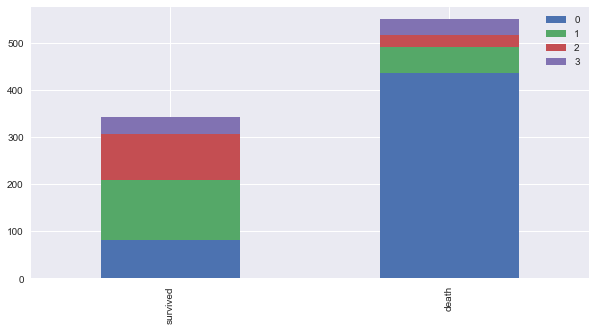

In [45]:

bar_chart('Title')
#상세한 신분에 대한 eda

In [50]:
# delete unnecessary feature from dataset
# name데이터는 안쓸거니까 삭제
#inplace:다른 저장 주소에 저장하지 않고 이것만 바꿔서 이것만 다시 저장하겠다(대용량 데이터에서 이렇게 하는게 효율적)
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [25]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test.head()

### 4.3 Sex

male: 0
female: 1

In [51]:
#남자 여자도 binary data 변환
# 남자0, 여자1으로 매핑할 수 있는 딕셔너리 만들기
sex_mapping = {"male": 0, "female": 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

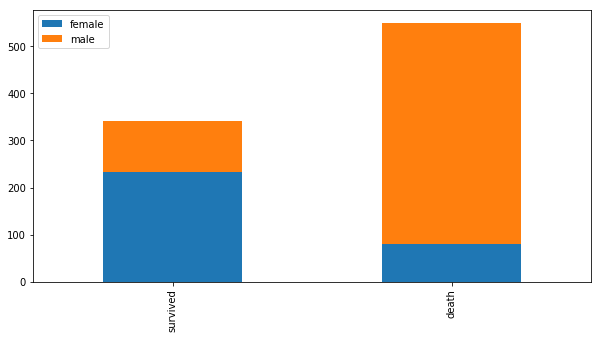

In [22]:
bar_chart('Sex')

### 4.4 Age

#### 4.4.1 some age is missing
Let's use Title's median age for missing Age

In [ ]:
train.head(100)

In [ ]:
# fill missing age with median age for each title (Mr, Mrs, Miss, Others) 결측값 채우기
#사람의 신분이 나이를 나타낼 수 있음, 사람들의 신분의 중간값으로 결측값 채우기
for dataset in train_test_data:
    dataset["Age"].fillna(train.groupby["Title"]["Age"].transform("median"), inplace=True)


In [ ]:
train.head(30)
train.groupby("Title")["Age"].transform("median")

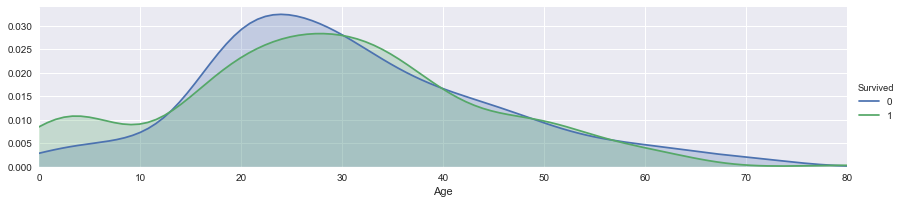

In [52]:
#나이에 대해 plot 그려보기

facet = sns.FacetGrid(train, hue="Survived",aspect=4) #aspect 좀 길게 그리겠따
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend() #데이터를 0과 1로 나눠서 그릴거니까 범례 추가
 
plt.show() 

In [ ]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4) #aspect 좀 길게 그리겠따
facet.map(sns.kdeplot, 'Age', shae=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()


plt.xlim(0, 20) #0~20살까지 그래프를 좀 더 자세히 볼 수 있음
#나이별로 그룹화하기 위함

In [ ]:

plt.xlim(20, 30)

In [ ]:

plt.xlim(30, 40)

In [ ]:

plt.xlim(40, 60)

In [ ]:

plt.xlim(40, 60)

In [ ]:

plt.xlim(60)

In [ ]:
train.info()

In [ ]:
test.info()

# 4.4.2 Binning
Binning/Converting Numerical Age to Categorical Variable  

feature vector map:  
child: 0  
young: 1  
adult: 2  
mid-age: 3  
senior: 4

In [30]:
# 나이 group 화 하기
# 16세 이하 : 0
# 17~26 : 1
# 27 ~ 36 : 2
# 36 ~ 62 : 3
# 63~  : 4

for dataset in train_test_data:
    dataset.loc[dataset['Age']<=16, 'Age'] = 0,
    dataset.loc[(dataset['Age']>16) & (dataset['Age']<=26), 'Age']=1,
    dataset.loc[(dataset['Age']>26) & (dataset['Age']<=36), 'Age']=2,
    dataset.loc[(dataset['Age']>36) & (dataset['Age']<=62), 'Age']=3,
    dataset.loc[(dataset['Age']>62), 'Age']=4

In [31]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,2.0,0,0,373450,8.0500,NaN,S,0


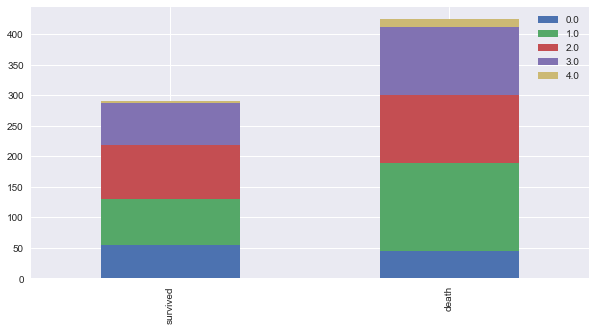

In [32]:
bar_chart('Age') # 나이그룹(범주형)에 대한 그래프

### 4.5 Embarked

#### 4.5.1 filling missing values

In [ ]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

more than 50% of 1st class are from S embark  
more than 50% of 2nd class are from S embark  
more than 50% of 3rd class are from S embark

**fill out missing embark with S embark**

In [ ]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [ ]:
train.head()

In [ ]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

### 4.6 Fare

In [ ]:
# fill missing Fare with median fare for each Pclass
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)
train.head(50)

In [ ]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
 
plt.show()  

In [ ]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0, 20)

In [ ]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0, 30)

In [ ]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0)

In [ ]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2,
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

In [ ]:
train.head()

### 4.7 Cabin

In [ ]:
train.Cabin.value_counts()

In [ ]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

In [ ]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [ ]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [ ]:
# fill missing Fare with median fare for each Pclass
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

### 4.8 FamilySize

In [ ]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

In [ ]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [ ]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [ ]:
train.head()

In [ ]:
test.head()

In [ ]:
features_drop = ['Ticket', 'SibSp', 'Parch'] # 삭제할 열 리스트로 묶어서 drop
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)

In [ ]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

In [53]:
train_data.head(10)
#정제된 데이터로 모델ㄹ링

NameError: name 'train_data' is not defined

## 5. Modelling

In [ ]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [ ]:
train.info()

### 6.2 Cross Validation (K-fold)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

### 6.2.1 kNN

In [ ]:
clf = KNeighborsClassifier(n_neighbors = 3)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

In [ ]:
# kNN Score
round(np.mean(score)*100, 2)

### 6.2.2 Decision Tree

In [ ]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

In [ ]:
# decision tree Score
round(np.mean(score)*100, 2)

### 6.2.3 Ramdom Forest

In [ ]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

In [ ]:
# Random Forest Score
round(np.mean(score)*100, 2)

### 6.2.4 Naive Bayes

In [ ]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

In [ ]:
# Naive Bayes Score
round(np.mean(score)*100, 2)

### 6.2.5 SVM

In [ ]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

In [ ]:
round(np.mean(score)*100,2)

## Xgboost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
clf = XGBClassifier()

In [ ]:
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

In [ ]:
round(np.mean(score)*100,2)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Create the parameter grid: gbm_param_grid 
gbm_param_grid = {
    'n_estimators': range(200, 400),
    'max_depth': range(0, 10),
    'learning_rate': [.01,.1,.4, .45, .5, .55, .6],
    'colsample_bytree': [.6, .7, .8, .9, 1]
}

# Instantiate the regressor: gbm
gbm = XGBClassifier()

# Perform random search: grid_mse
xgb_random = RandomizedSearchCV(param_distributions=gbm_param_grid, 
                                    estimator = gbm, scoring = "accuracy", 
                                    verbose = 1, n_iter = 50, cv = 10)

# Fit randomized_mse to the data
xgb_random.fit(train_data, target)

# Print the best parameters and lowest RMSE
print("Best parameters found: ", xgb_random.best_params_)
print("Best accuracy found: ", xgb_random.best_score_)

In [ ]:
model = XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05)

In [ ]:
score = cross_val_score(model, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

In [ ]:
round(np.mean(score)*100,2)

In [ ]:
from xgboost import plot_importance
model.fit(train_data,target)
plot_importance(model)
plt.show()

## 7. Testing

In [ ]:
clf = SVC()
clf.fit(train_data, target)

test_data = test.drop("PassengerId", axis=1).copy()
prediction = clf.predict(test_data)

In [ ]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('submission.csv', index=False)

In [ ]:
submission = pd.read_csv('submission.csv')
submission.head()

## References

This notebook is created by learning from the following notebooks:

- [Mukesh ChapagainTitanic Solution: A Beginner's Guide](https://www.kaggle.com/chapagain/titanic-solution-a-beginner-s-guide?scriptVersionId=1473689)
- [How to score 0.8134 in Titanic Kaggle Challenge](http://ahmedbesbes.com/how-to-score-08134-in-titanic-kaggle-challenge.html)
- [Titanic: factors to survive](https://olegleyz.github.io/titanic_factors.html)
- [Titanic Survivors Dataset and Data Wrangling](http://www.codeastar.com/data-wrangling/)
